# Regression Python [Herly]

## Read Data

In [1]:
import pandas as pd

df = pd.read_csv('boston.csv')
df.sample(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19,16.2
227,0.41238,0.0,6.20,0,0.504,7.163,79.9,3.2157,8,307,17.4,372.08,6.36,31.6
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403,14.7,341.60,13.28,19.6
247,0.19657,22.0,5.86,0,0.431,6.226,79.2,8.0555,7,330,19.1,376.14,10.15,20.5
20,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
153,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403,14.7,261.95,15.79,19.4
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3
311,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304,18.4,396.90,5.98,22.1
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47,19.5
208,0.13587,0.0,10.59,1,0.489,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4


Data tersebut tentang prediksi harga rumah (medv) di kota Boston, fitur:
1. Criminal rate (crim)
2. Residential land zoned proportion (zn)
3. Non-retail business acres proportion (indus)
4. Is bounds with river (chas)
5. Nitrogen oxides concentration (nox)
6. Number rooms average (rm)
7. Owner age proportion (age)
8. Weighted distance to cities (dis)
9. Accessibility index (rad)
10. Tax rate (tax)
11. Pupil-teacher ratio (ptratio)
12. Black proportion (black)
13. Percent lower status (lstat)


## Split Data

In [2]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

# First splitting: pretrain and test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

feature_df_train.shape, feature_df_validation.shape, feature_df_test.shape

((323, 13), (81, 13), (102, 13))

## Preprocessing Data

In [3]:
# menggabungkan data feature dan target untuk kebutuhan preprocessing data
data_train = pd.concat([feature_df_train, target_df_train], axis=1)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 54 to 83
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     323 non-null    float64
 1   zn       323 non-null    float64
 2   indus    323 non-null    float64
 3   chas     323 non-null    int64  
 4   nox      323 non-null    float64
 5   rm       323 non-null    float64
 6   age      323 non-null    float64
 7   dis      323 non-null    float64
 8   rad      323 non-null    int64  
 9   tax      323 non-null    int64  
 10  ptratio  323 non-null    float64
 11  black    323 non-null    float64
 12  lstat    323 non-null    float64
 13  medv     323 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 37.9 KB


### Handling Duplicated

In [5]:
data_train.duplicated().sum()

0

Dataset ini tidak memiliki Duplicated Row

### Handling Missing Value

In [6]:
data_train.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Berdasarkan informasi di atas, semua kolom tidak memiliki missing value.

### Handling Outlier

In [7]:
data_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


=== Visualisasi Sebelum Penanganan Outlier (Data Train) ===


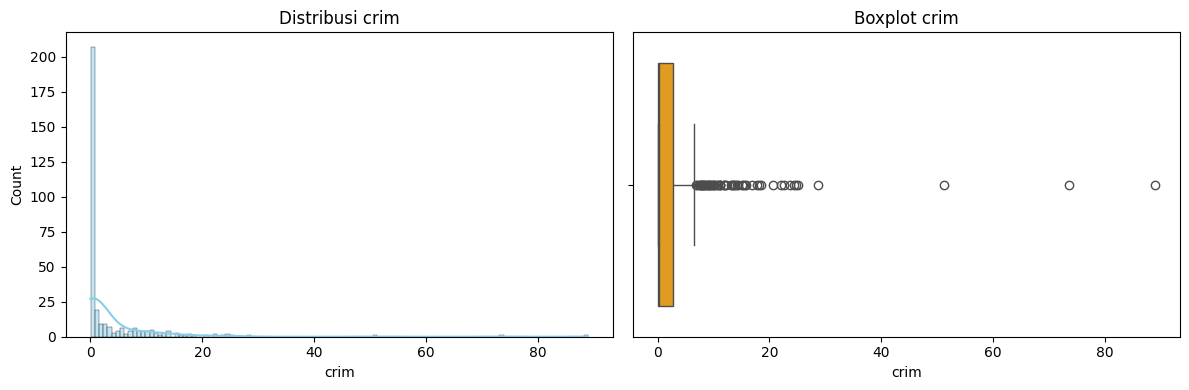

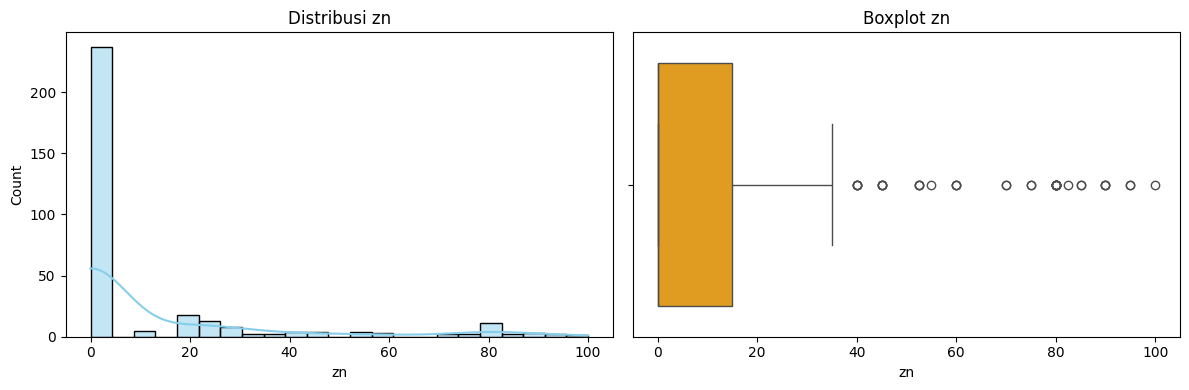

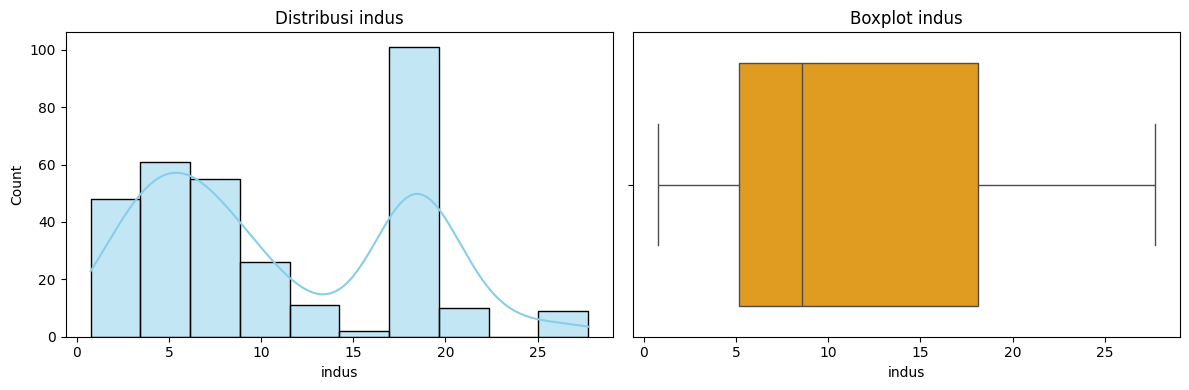

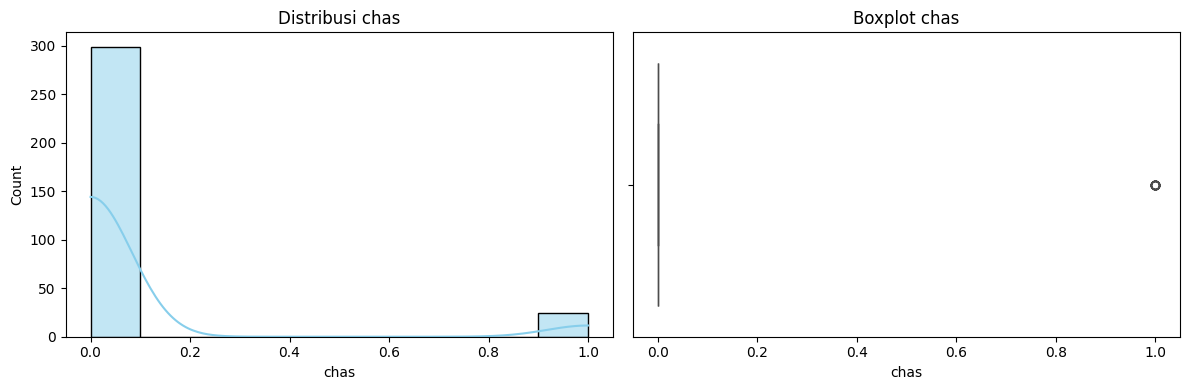

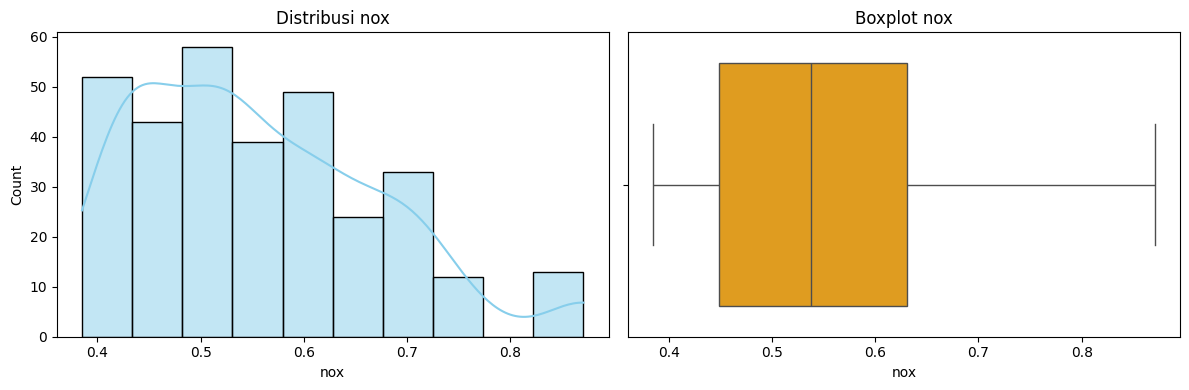

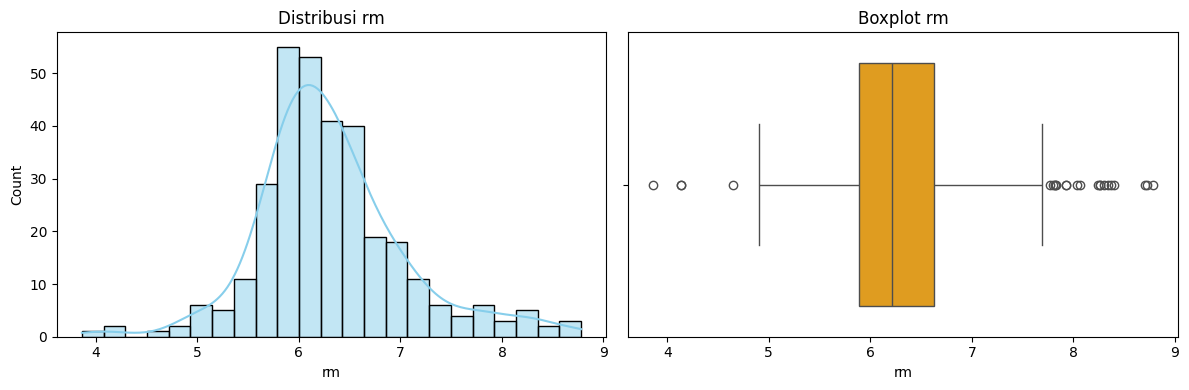

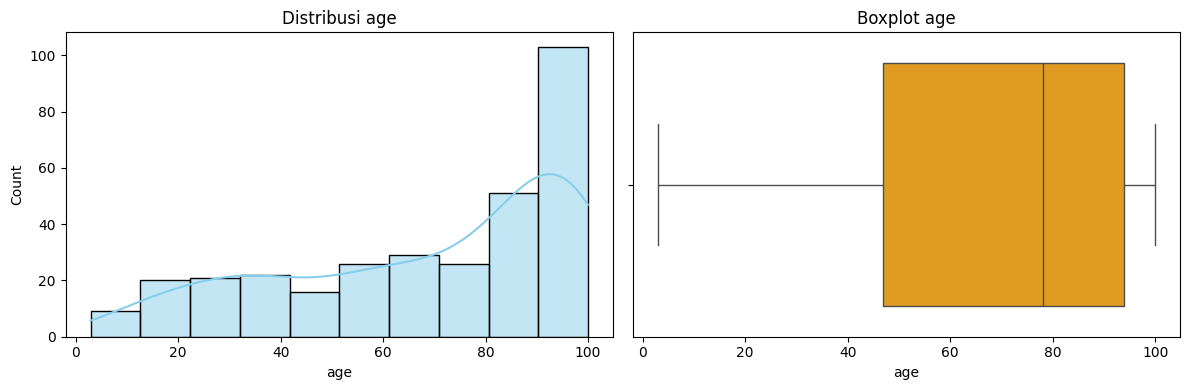

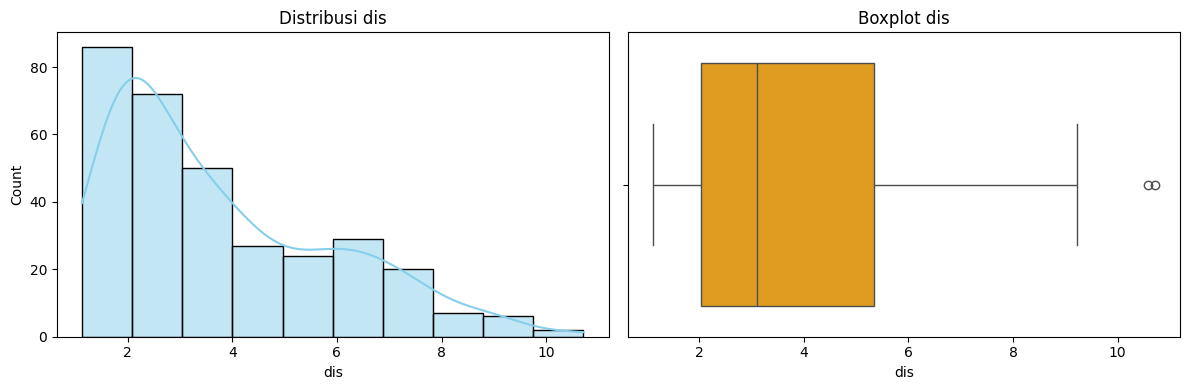

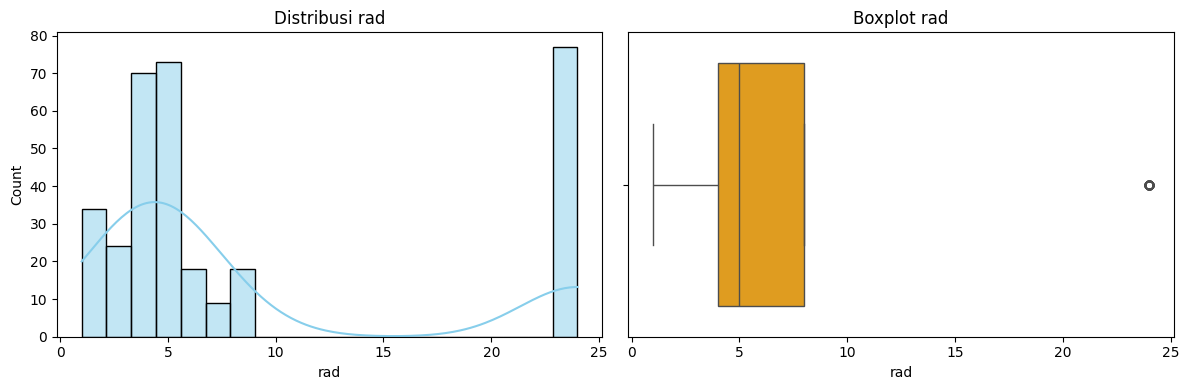

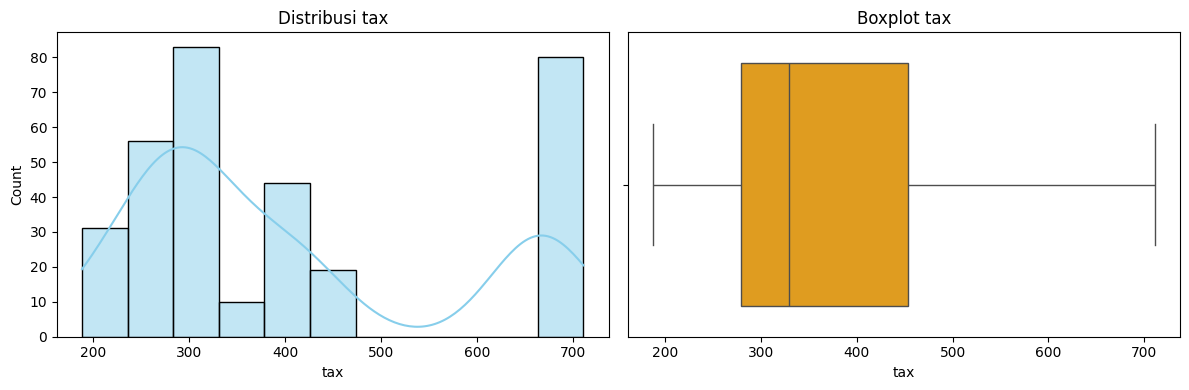

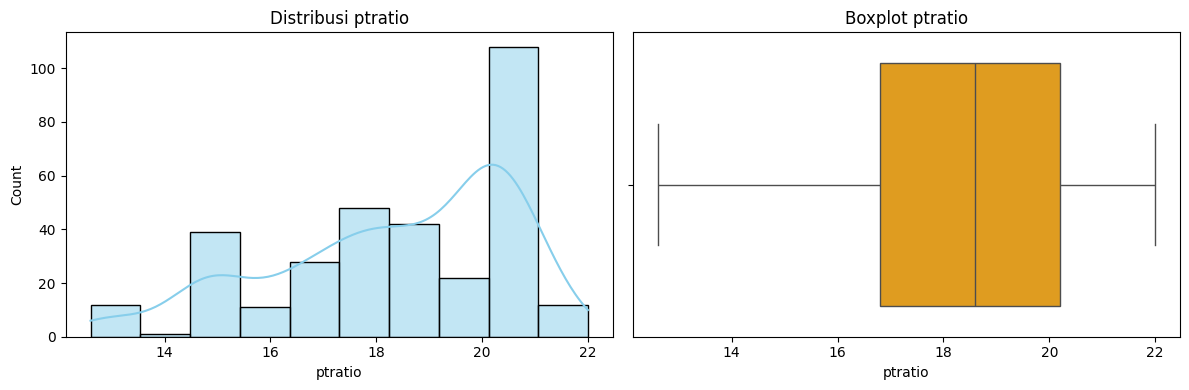

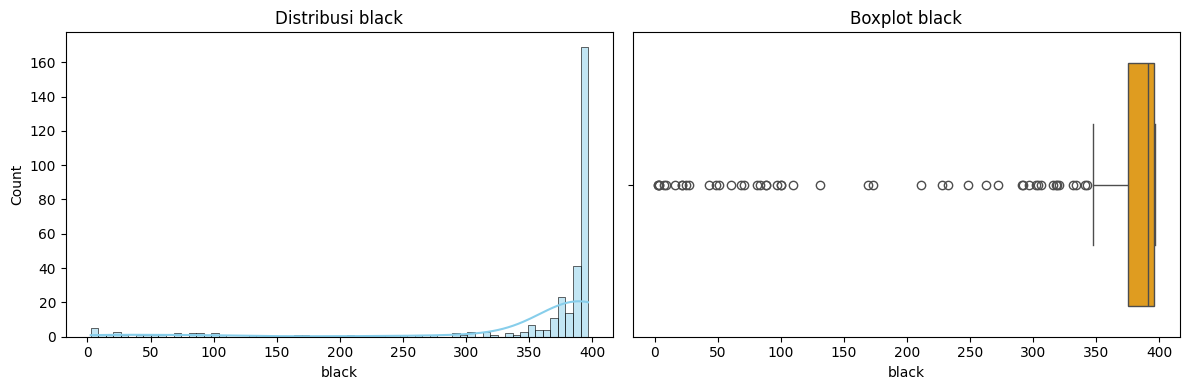

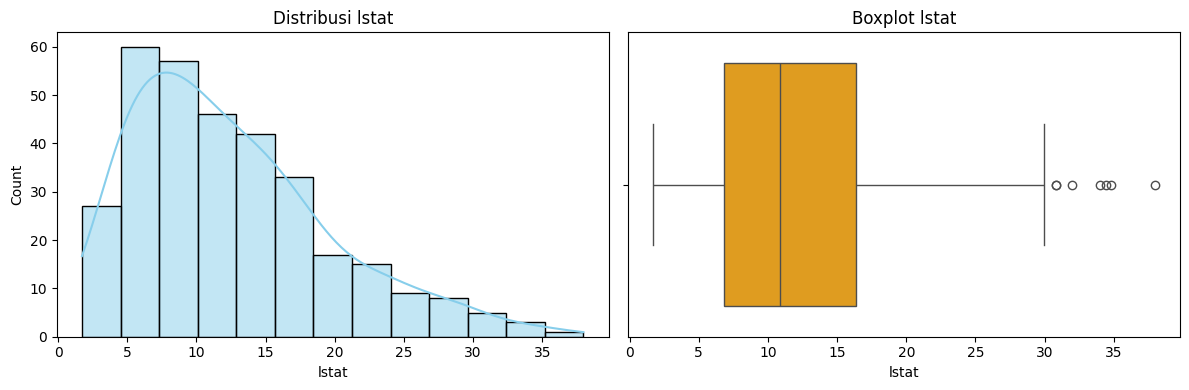

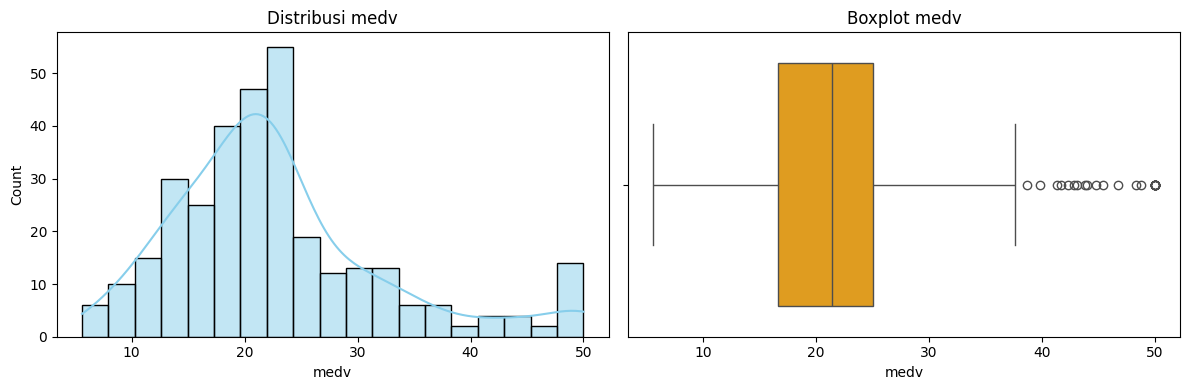

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_kolom = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']

# Visualisasi grafik
def plot_distribution_outlier(data, kolom):

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  # Plot distribusi
  sns.histplot(data[kolom], kde=True, ax=axes[0], color="skyblue")
  axes[0].set_title(f'Distribusi {kolom}')

  # Boxplot untuk outlier
  sns.boxplot(x=data[kolom], ax=axes[1], color="orange")
  axes[1].set_title(f'Boxplot {kolom}')

  plt.tight_layout()
  plt.show()

print("\n=== Visualisasi Sebelum Penanganan Outlier (Data Train) ===")
for kolom in kolom_kolom:
    plot_distribution_outlier(data_train, kolom)


Berdasarkan visulisasi Histogram dan Boxplot di atas, dapat dilihat bahwa adanya indikasi outlier pada data ini, tetapi dalam melakukan handling outlier tidak bisa sembarangan, terutama dalam pembuatan model, mengingat bahwasanya proses handling outlier ini bisa saja berdampak positif atau bahkan negatif untuk model yang akan dibuat, untuk itu akan dibuat dataframe baru yang merupakan hasil handling outlier. Metode Handling Outlier yang digunakan adalah IQR dan Z-score.

#### Dataframe Baru (df_noOutlier)

In [9]:
# Membuaat salinan DataFrame df, agar tidak mengganggu data asal (df)
df_noOutlier = data_train.copy()

#### Z-Score Method

In [10]:
from scipy import stats

kolom_analisis = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']

# menghitung Z-Score untuk setiap kolom
for kolom in kolom_analisis:
     df_noOutlier[f'Z_Score_{kolom}'] = stats.zscore(df_noOutlier[kolom])

In [11]:
df_noOutlier.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv', 'Z_Score_crim', 'Z_Score_zn',
       'Z_Score_indus', 'Z_Score_chas', 'Z_Score_nox', 'Z_Score_rm',
       'Z_Score_age', 'Z_Score_dis', 'Z_Score_rad', 'Z_Score_tax',
       'Z_Score_ptratio', 'Z_Score_black', 'Z_Score_lstat', 'Z_Score_medv'],
      dtype='object')

In [12]:
# menghitung jumlah data yang bernilai di bawah -3 atau di atas 3
kolom_zscore = ['Z_Score_crim', 'Z_Score_zn',
       'Z_Score_indus', 'Z_Score_chas', 'Z_Score_nox', 'Z_Score_rm',
       'Z_Score_age', 'Z_Score_dis', 'Z_Score_rad', 'Z_Score_tax',
       'Z_Score_ptratio', 'Z_Score_black', 'Z_Score_lstat', 'Z_Score_medv']
for kolom in kolom_zscore:
    jumlah_outlier = ((df_noOutlier[kolom] < -3) | (df_noOutlier[kolom] > 3)).sum()
    print(f"Jumlah outlier pada {kolom}: {jumlah_outlier}")


Jumlah outlier pada Z_Score_crim: 3
Jumlah outlier pada Z_Score_zn: 9
Jumlah outlier pada Z_Score_indus: 0
Jumlah outlier pada Z_Score_chas: 24
Jumlah outlier pada Z_Score_nox: 0
Jumlah outlier pada Z_Score_rm: 4
Jumlah outlier pada Z_Score_age: 0
Jumlah outlier pada Z_Score_dis: 2
Jumlah outlier pada Z_Score_rad: 0
Jumlah outlier pada Z_Score_tax: 0
Jumlah outlier pada Z_Score_ptratio: 0
Jumlah outlier pada Z_Score_black: 15
Jumlah outlier pada Z_Score_lstat: 4
Jumlah outlier pada Z_Score_medv: 0


Output tersebut menunjukkan jumlah outlier pada setiap fitur dataset prediksi harga rumah di kota Boston menggunakan metode Z-Score. Fitur-fitur dengan jumlah outlier yang signifikan adalah:

1.  Z_Score_chas (29): Menunjukkan bahwa ada 29 data yang memiliki nilai ekstrem pada fitur "Is bounds with river", yang berarti ada beberapa rumah yang memiliki lokasi unik di dekat sungai.
2.  Z_Score_black (20): Menunjukkan bahwa ada 20 data yang memiliki nilai ekstrem pada fitur "Black proportion", yang berarti ada beberapa daerah dengan proporsi penduduk kulit hitam yang sangat tinggi atau rendah.
3.  Z_Score_zn (11): Menunjukkan bahwa ada 11 data yang memiliki nilai ekstrem pada fitur "Residential land zoned proportion", yang berarti ada beberapa daerah dengan proporsi lahan perumahan yang sangat tinggi atau rendah.

Fitur-fitur lainnya memiliki jumlah outlier yang relatif rendah atau tidak ada outlier sama sekali, menunjukkan bahwa nilai-nilai pada fitur-fitur tersebut relatif stabil dan tidak memiliki nilai ekstrem.

Hasil ini dapat digunakan untuk mempertimbangkan strategi penanganan outlier, seperti transformasi data atau penghapusan outlier, untuk meningkatkan kualitas data dan kinerja model prediksi harga rumah.

#### IQR Method

In [13]:
kolom_cek = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv',]

for kolom in kolom_cek:
    IQR = df_noOutlier[kolom].quantile(0.75) - df_noOutlier[kolom].quantile(0.25)
    lower_boundary = df_noOutlier[kolom].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df_noOutlier[kolom].quantile(0.75) + (IQR * 1.5)

    print(f"Kolom: {kolom}")
    print(f"Lower Boundary: {lower_boundary}")
    print(f"Upper Boundary: {upper_boundary}")
    print()

Kolom: crim
Lower Boundary: -3.82605
Upper Boundary: 6.591189999999999

Kolom: zn
Lower Boundary: -22.5
Upper Boundary: 37.5

Kolom: indus
Lower Boundary: -14.250000000000004
Upper Boundary: 37.510000000000005

Kolom: chas
Lower Boundary: 0.0
Upper Boundary: 0.0

Kolom: nox
Lower Boundary: 0.17475000000000002
Upper Boundary: 0.9047499999999999

Kolom: rm
Lower Boundary: 4.77425
Upper Boundary: 7.744249999999999

Kolom: age
Lower Boundary: -23.549999999999997
Upper Boundary: 164.45

Kolom: dis
Lower Boundary: -2.937874999999999
Upper Boundary: 10.313125

Kolom: rad
Lower Boundary: -2.0
Upper Boundary: 14.0

Kolom: tax
Lower Boundary: 18.0
Upper Boundary: 714.0

Kolom: ptratio
Lower Boundary: 11.700000000000003
Upper Boundary: 25.299999999999997

Kolom: black
Lower Boundary: 344.9100000000001
Upper Boundary: 427.06999999999994

Kolom: lstat
Lower Boundary: -7.530000000000006
Upper Boundary: 30.750000000000007

Kolom: medv
Lower Boundary: 4.049999999999995
Upper Boundary: 37.6500000000000

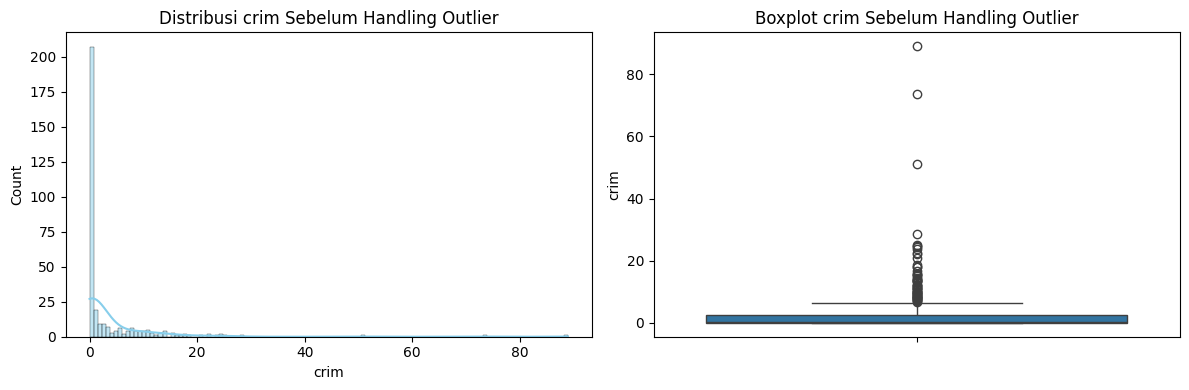

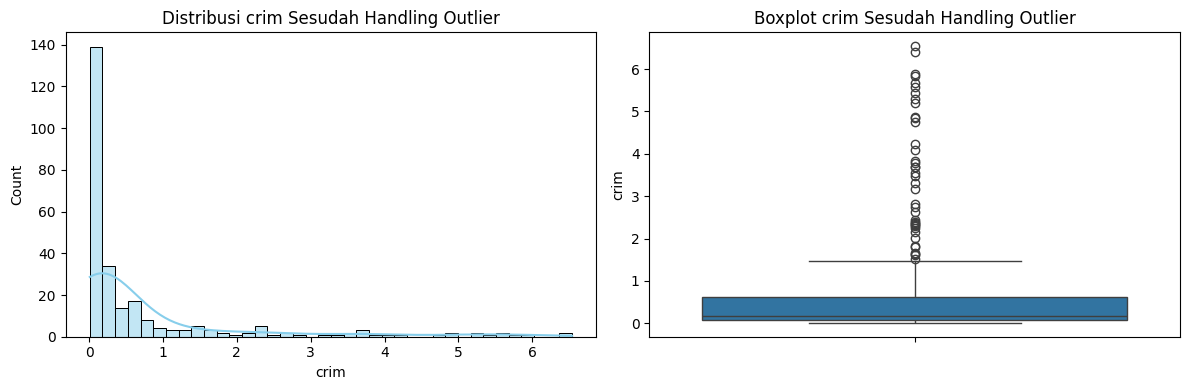

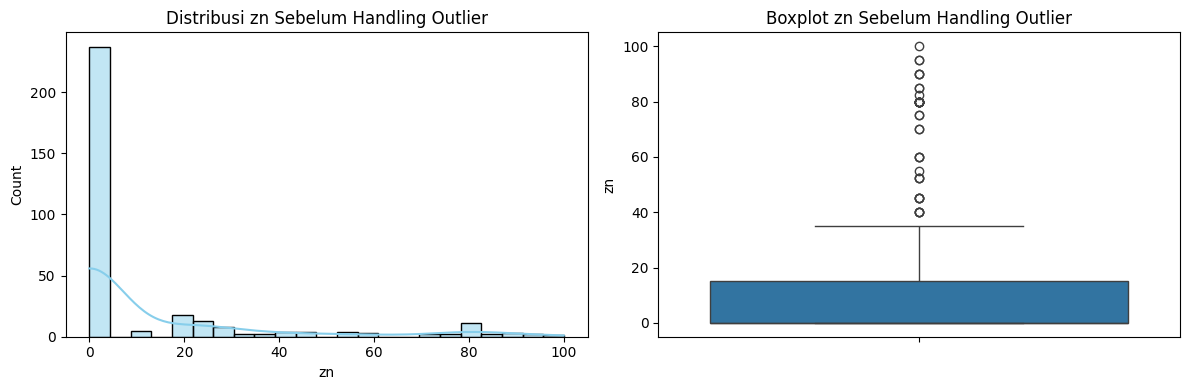

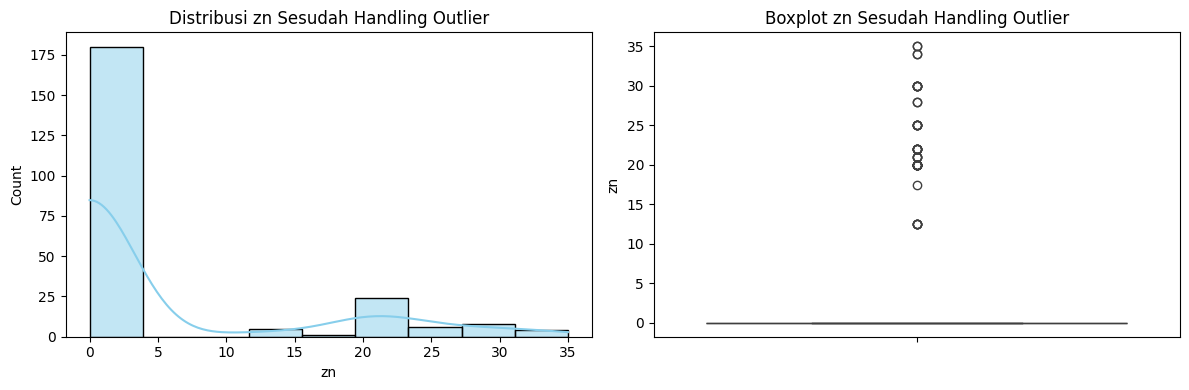

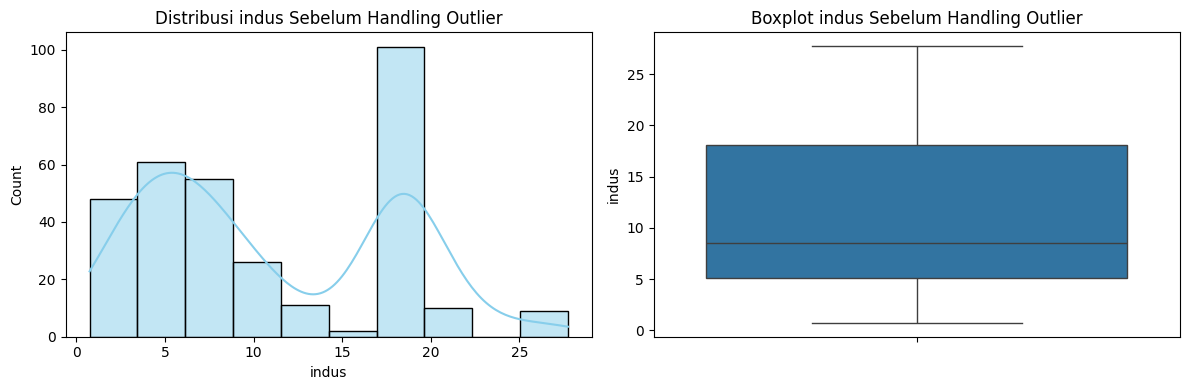

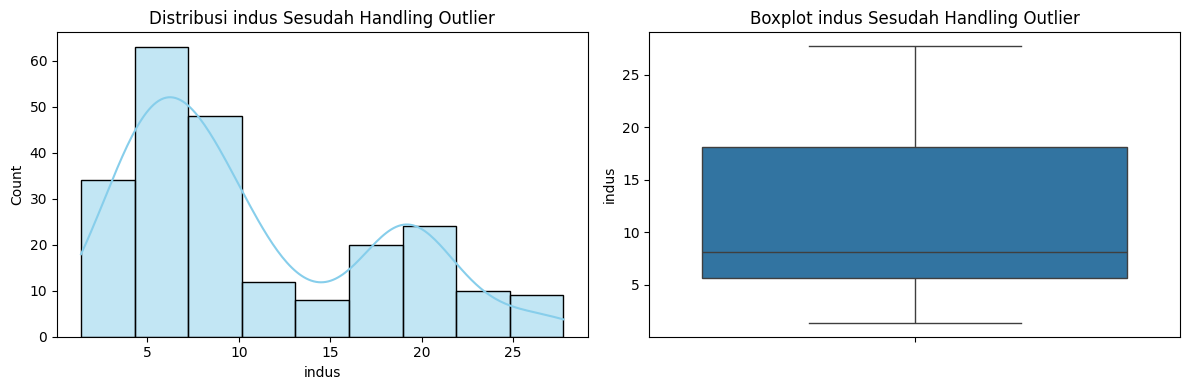

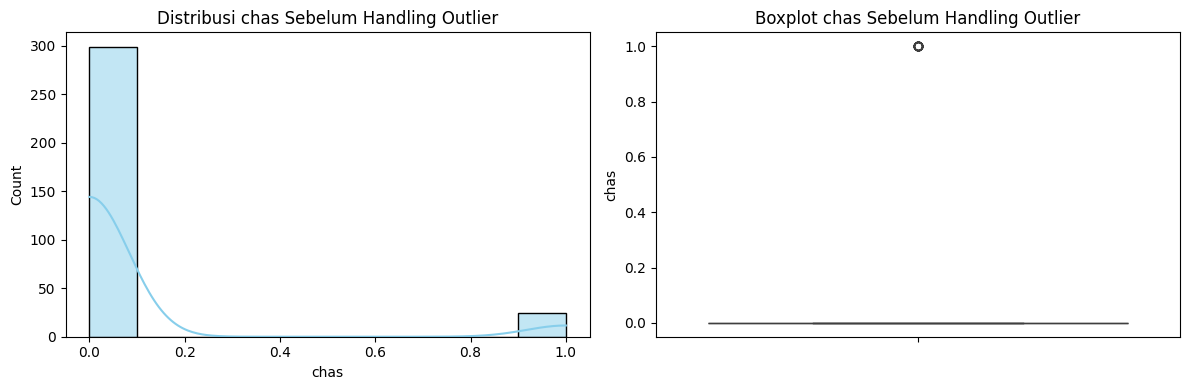

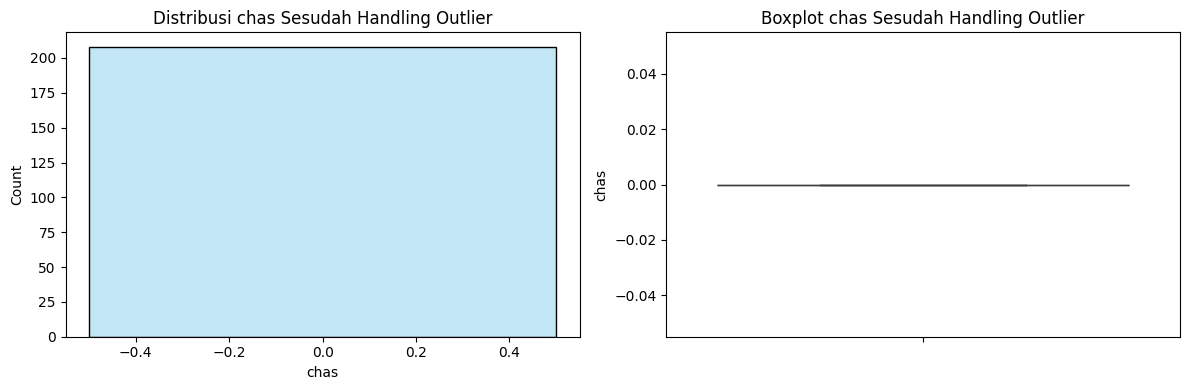

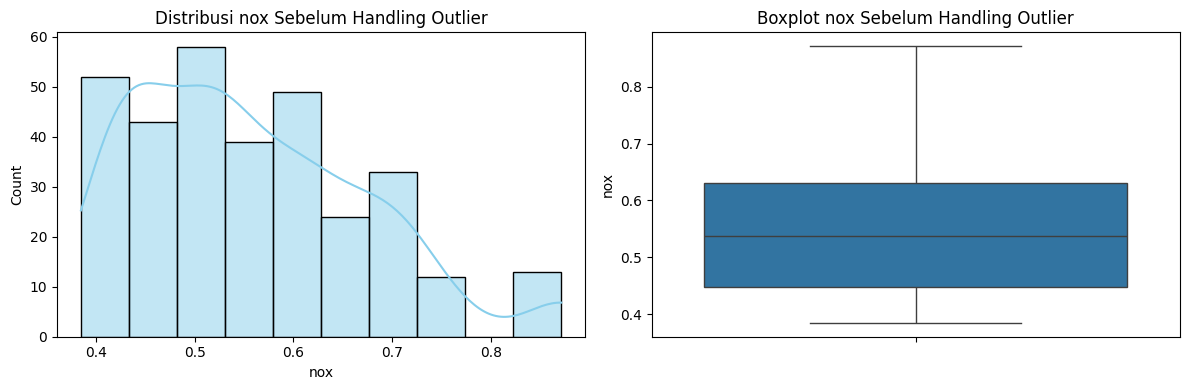

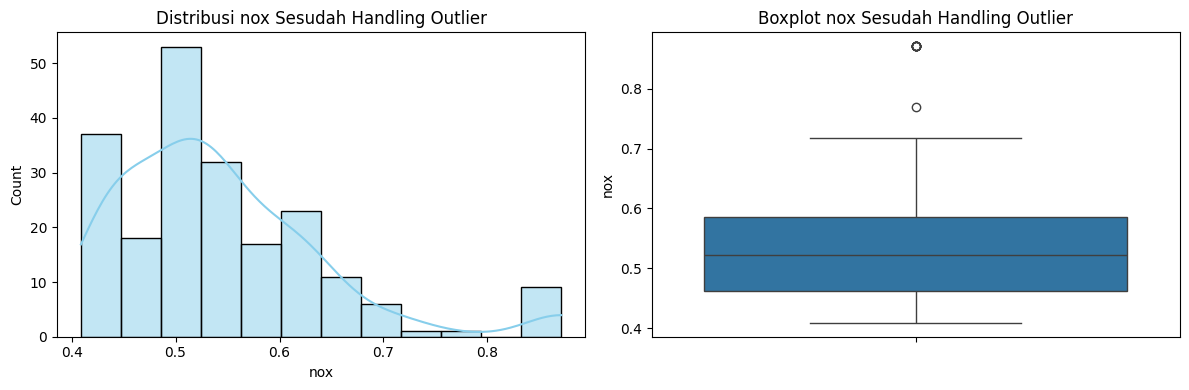

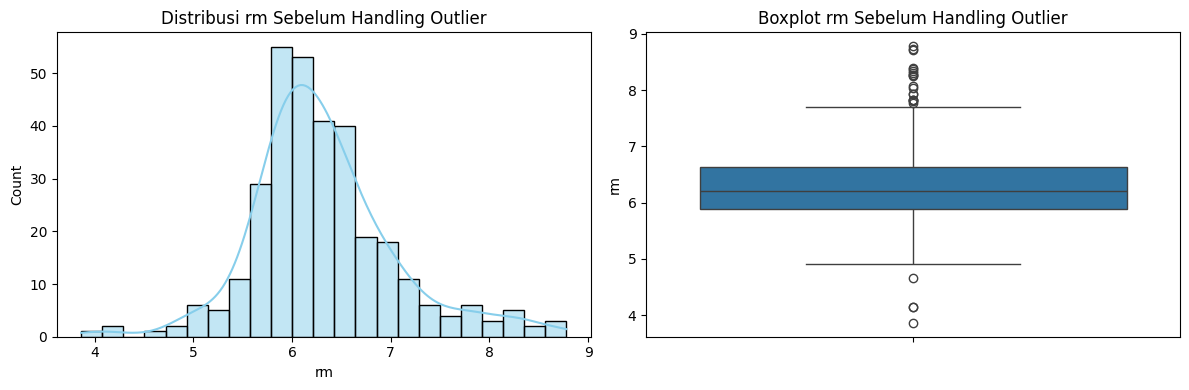

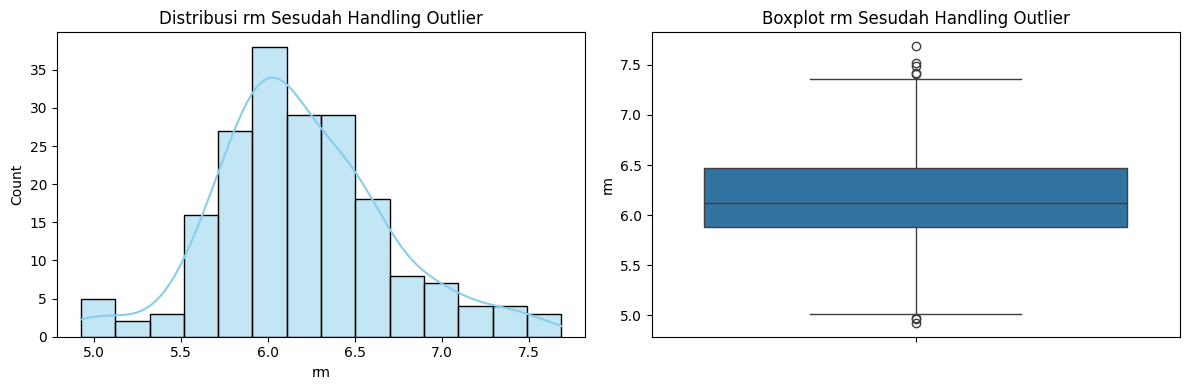

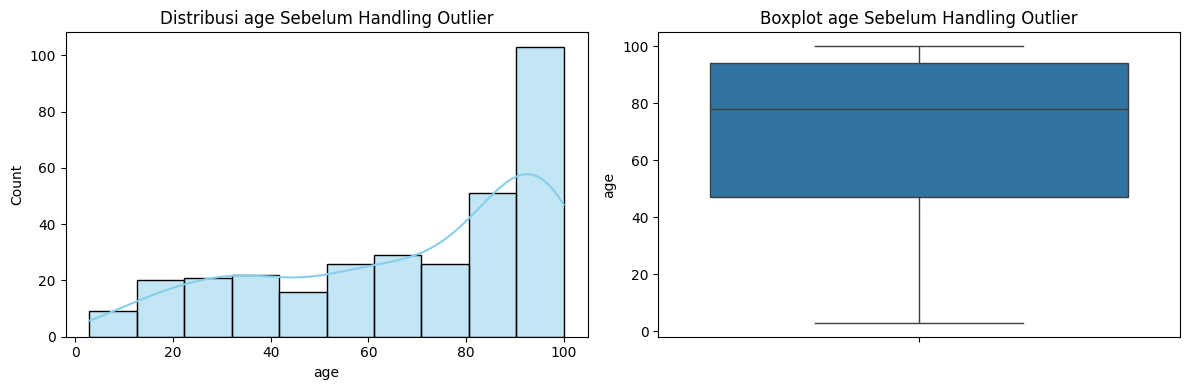

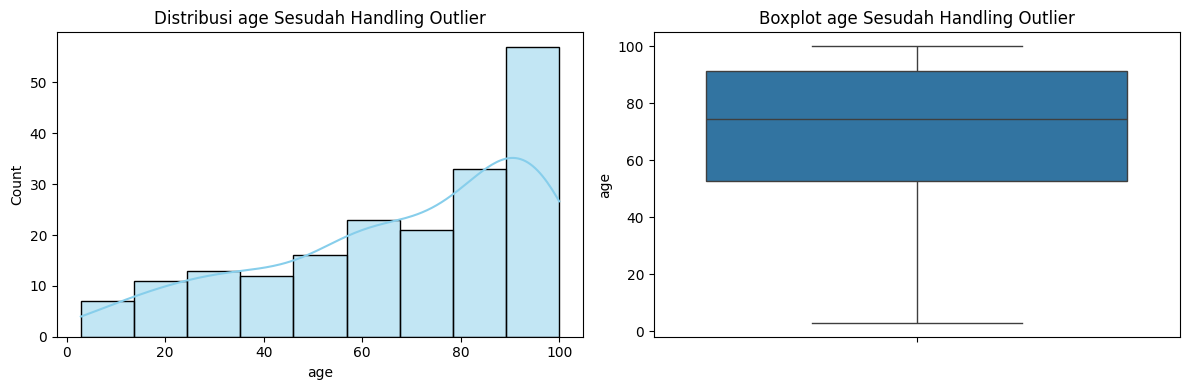

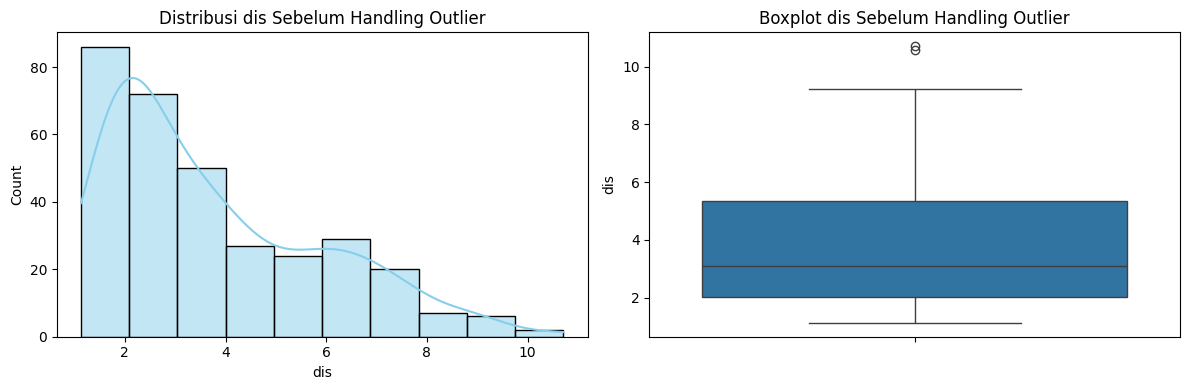

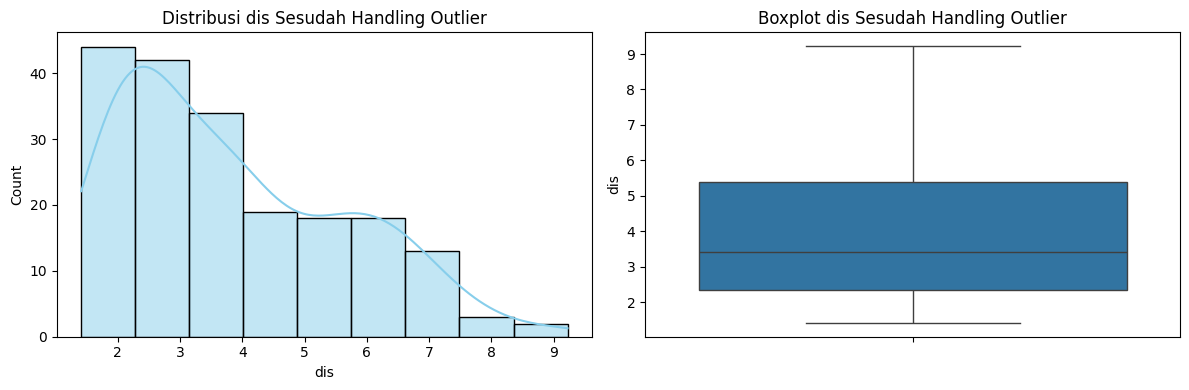

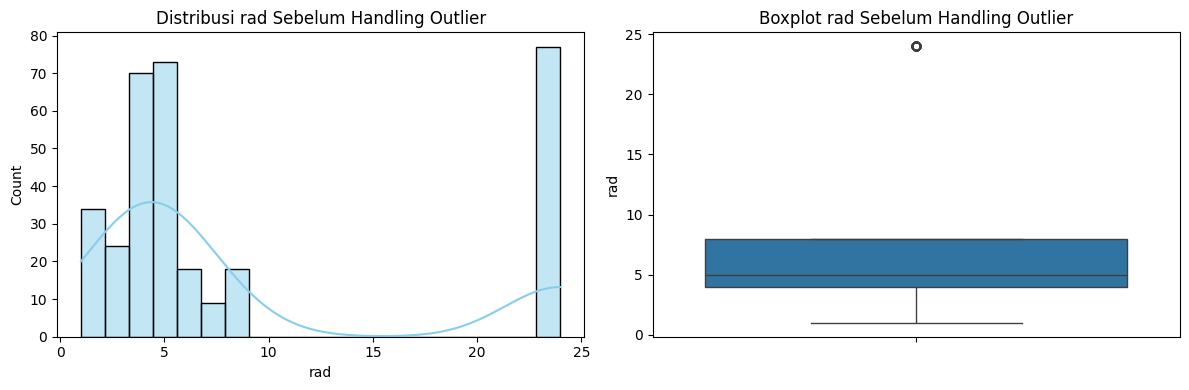

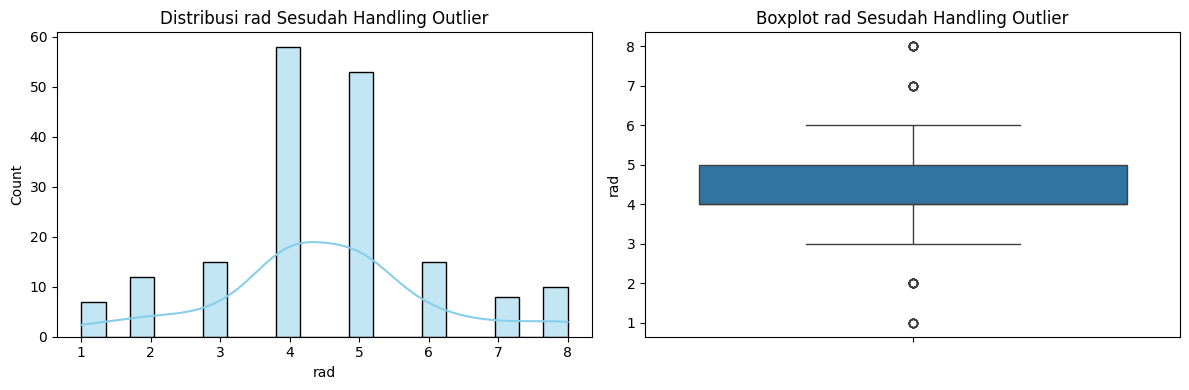

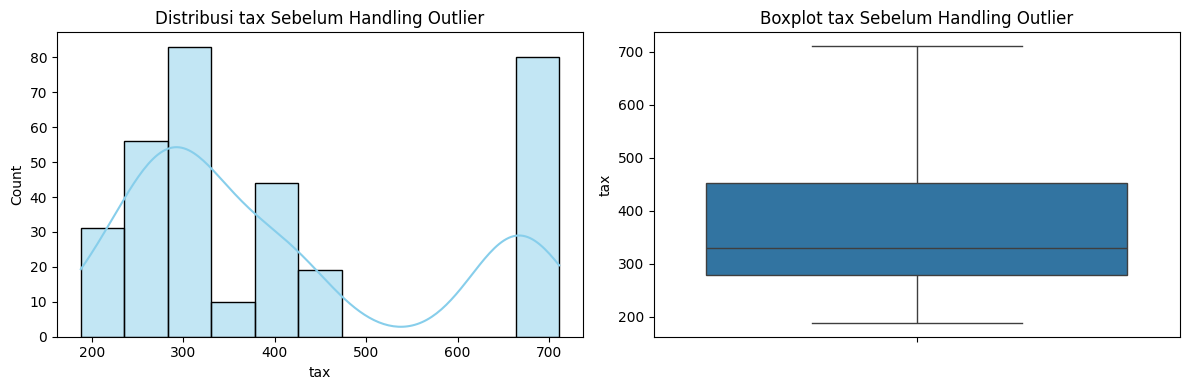

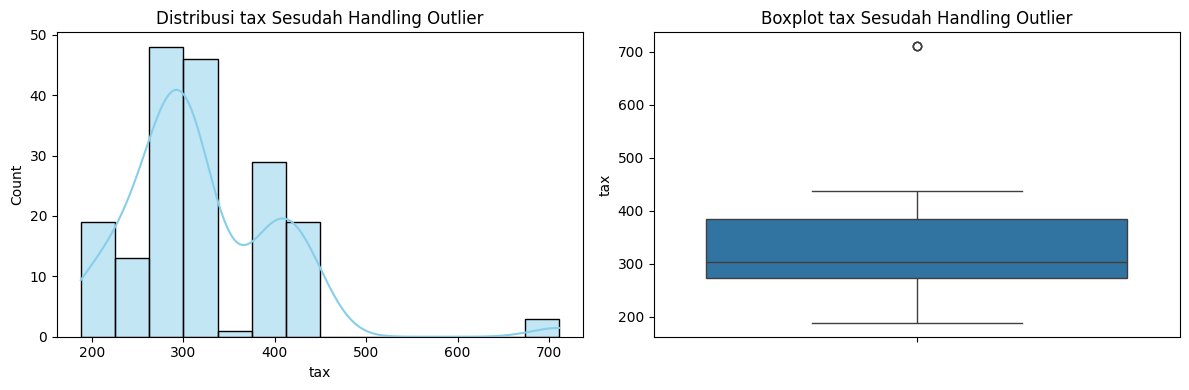

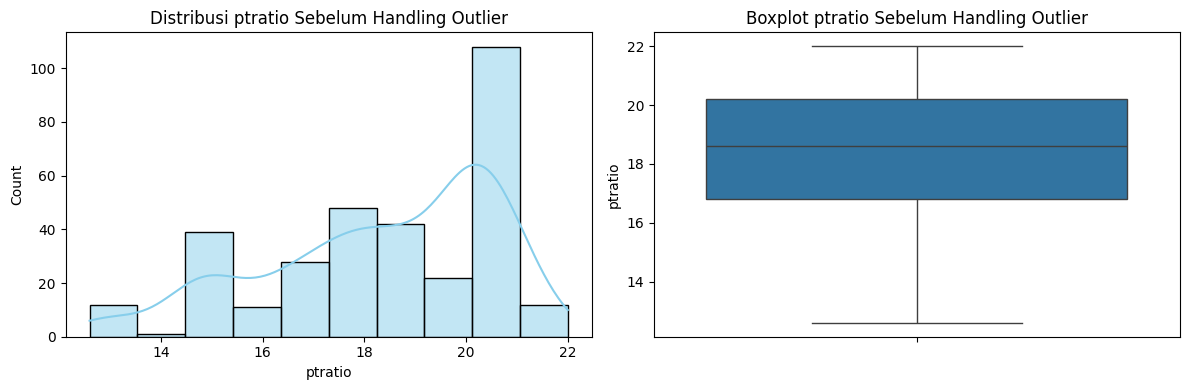

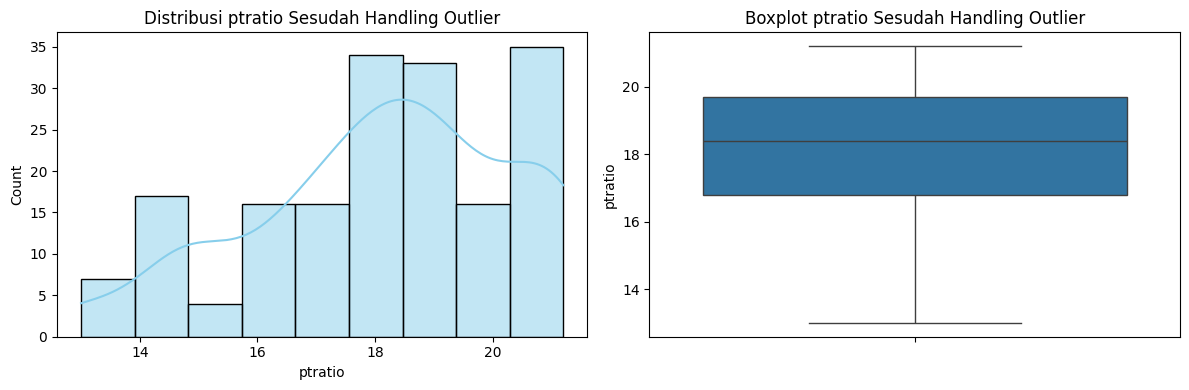

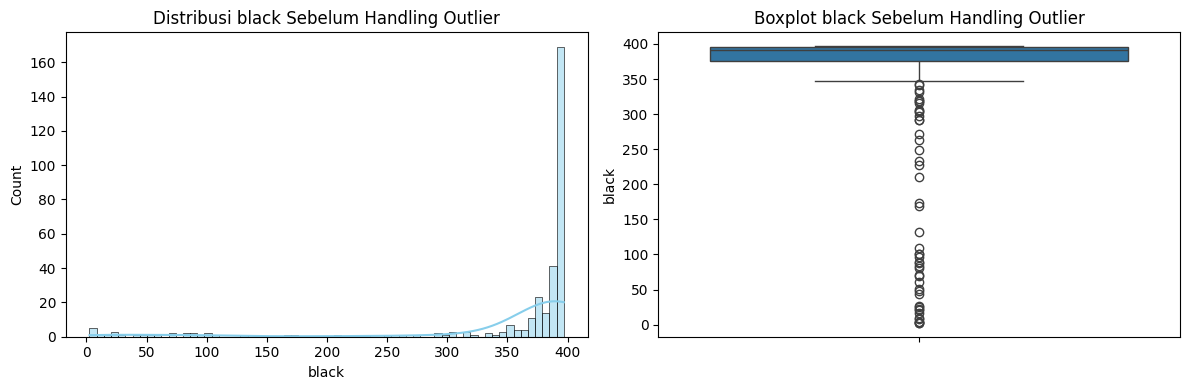

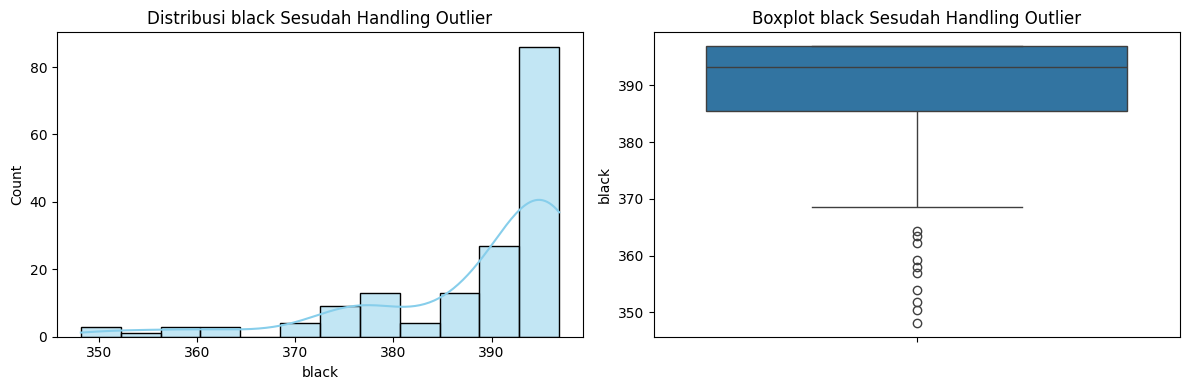

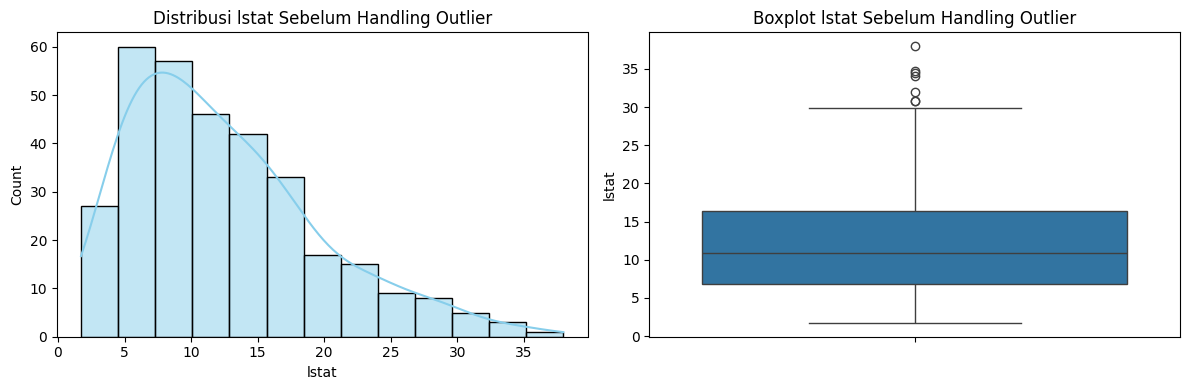

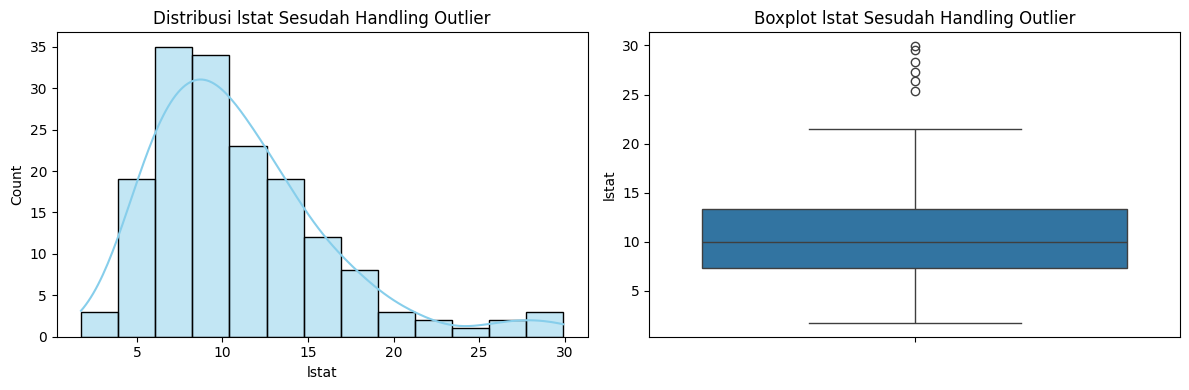

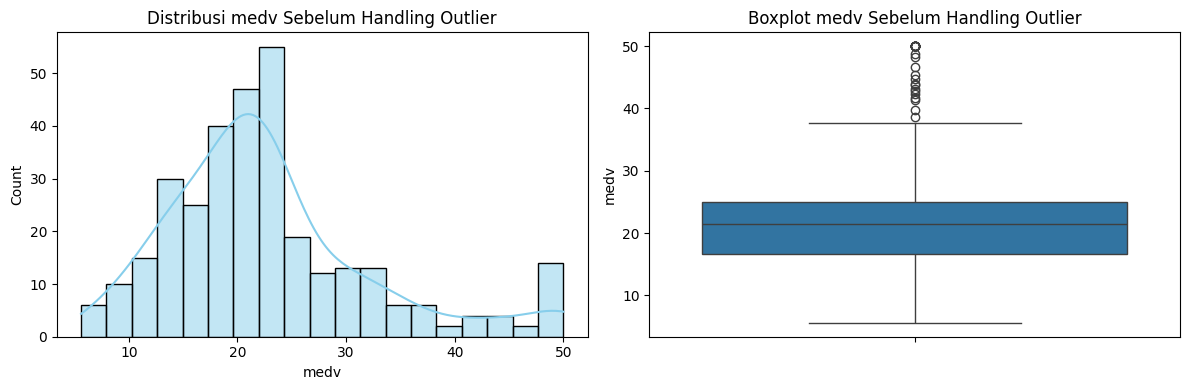

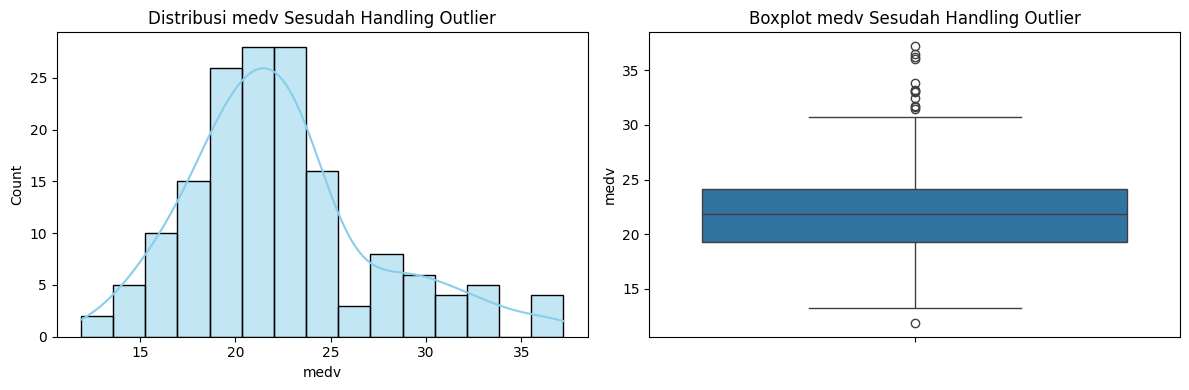

In [14]:
# Kolom yang akan dicek
kolom_cek = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

# Buat salinan df_noOutlier
df_noOutlier_afterHandling = df_noOutlier.copy()

# Iterasi
for kolom in kolom_cek:
    # Handling Outlier dengan IQR
    IQR = df_noOutlier[kolom].quantile(0.75) - df_noOutlier[kolom].quantile(0.25)
    lower_boundary = df_noOutlier[kolom].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df_noOutlier[kolom].quantile(0.75) + (IQR * 1.5)

    # Data setelah Handling Outlier
    df_noOutlier_afterHandling = df_noOutlier_afterHandling[(df_noOutlier_afterHandling[kolom] <= upper_boundary) & (df_noOutlier_afterHandling[kolom] >= lower_boundary)]

    # Visualisasi data sebelum Handling
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_noOutlier[kolom], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Distribusi {kolom} Sebelum Handling Outlier')
    sns.boxplot(data=df_noOutlier, y=kolom, ax=axes[1])
    axes[1].set_title(f"Boxplot {kolom} Sebelum Handling Outlier")
    plt.tight_layout()
    plt.show()

    # Visualisasi Data setelah Handling
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_noOutlier_afterHandling[kolom], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Distribusi {kolom} Sesudah Handling Outlier')
    sns.boxplot(data=df_noOutlier_afterHandling, y=kolom, ax=axes[1])
    axes[1].set_title(f"Boxplot {kolom} Sesudah Handling Outlier")
    plt.tight_layout()
    plt.show()

Berdasarkan proses Handling Outlier menggunakan metode IQR di atas, dapat dilihat bahwasanya nilai Outlier sudah berkurang tetapi ini sangat berpengaruh pada model yang akan di-Developed, Sehingga ini tidak efektif untuk dilakukan Handling Outlier. Untuk itu data yang digunakan adalah tetap data awal sebelum handling outlier.

## Exploratory Data Analysis

In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 54 to 83
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     323 non-null    float64
 1   zn       323 non-null    float64
 2   indus    323 non-null    float64
 3   chas     323 non-null    int64  
 4   nox      323 non-null    float64
 5   rm       323 non-null    float64
 6   age      323 non-null    float64
 7   dis      323 non-null    float64
 8   rad      323 non-null    int64  
 9   tax      323 non-null    int64  
 10  ptratio  323 non-null    float64
 11  black    323 non-null    float64
 12  lstat    323 non-null    float64
 13  medv     323 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 37.9 KB


In [16]:
data_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.00000,323.000000,323.000000,323.000000,323.000000
mean,3.491326,11.569659,11.086409,0.074303,0.557080,6.318282,68.854180,3.776294,9.077399,400.79257,18.307121,354.293777,12.500464,22.786068
std,8.572041,23.573177,6.968780,0.262671,0.118448,0.732472,27.971904,2.129372,8.493159,164.34231,2.240628,95.470462,7.152416,9.545183
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,188.00000,12.600000,2.520000,1.730000,5.600000
25%,0.080415,0.000000,5.160000,0.000000,0.448500,5.888000,46.950000,2.031250,4.000000,279.00000,16.800000,375.720000,6.825000,16.650000
50%,0.269380,0.000000,8.560000,0.000000,0.538000,6.209000,78.100000,3.112100,5.000000,329.00000,18.600000,391.270000,10.870000,21.400000
75%,2.684725,15.000000,18.100000,0.000000,0.631000,6.630500,93.950000,5.344000,8.000000,453.00000,20.200000,396.260000,16.395000,25.050000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.00000,22.000000,396.900000,37.970000,50.000000


Output dari data_train.describe() menunjukkan statistik deskriptif dari dataset prediksi harga rumah di kota Boston. Dataset ini memiliki 404 sampel dan 14 fitur. Berikut adalah beberapa poin penting dari output tersebut:

1. Fitur crim memiliki rata-rata 3,61 dan standar deviasi 8,88, menunjukkan bahwa tingkat kejahatan di kota Boston memiliki variasi yang cukup besar.
2. Fitur zn memiliki rata-rata 11,57 dan standar deviasi 23,15, menunjukkan bahwa proporsi lahan perumahan di kota Boston memiliki variasi yang cukup besar.
3. Fitur medv memiliki rata-rata 22,80 dan standar deviasi 9,33, menunjukkan bahwa harga rumah di kota Boston memiliki variasi yang cukup besar, dengan harga minimum 5,0 dan maksimum 50,0.
4. Fitur chas memiliki rata-rata 0,07 dan standar deviasi 0,26, menunjukkan bahwa hanya sebagian kecil rumah di kota Boston yang berada di dekat sungai.
5. Fitur rm memiliki rata-rata 6,32 dan standar deviasi 0,71, menunjukkan bahwa jumlah kamar rata-rata di rumah-rumah di kota Boston adalah sekitar 6-7 kamar.

Secara keseluruhan, output tersebut menunjukkan bahwa dataset prediksi harga rumah di kota Boston memiliki variasi yang cukup besar dalam beberapa fitur, dan beberapa fitur memiliki distribusi yang tidak normal.

### Menghitung VIF Score

In [17]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


Output VIF score menunjukkan bahwa beberapa fitur memiliki multikolinearitas moderat hingga tinggi. Fitur rad (7,66) dan tax (8,94) memiliki VIF score di atas 5, menunjukkan multikolinearitas tinggi. Fitur nox (4,47), dis (4,17), dan indus (3,88) memiliki VIF score antara 3-5, menunjukkan multikolinearitas moderat. Fitur lainnya memiliki VIF score di bawah 3, menunjukkan multikolinearitas rendah. Hasil ini menunjukkan bahwa beberapa fitur mungkin memiliki korelasi kuat, perlu penanganan lebih lanjut untuk menghindari masalah multikolinearitas dalam model regresi.

### Heatmap Correlation

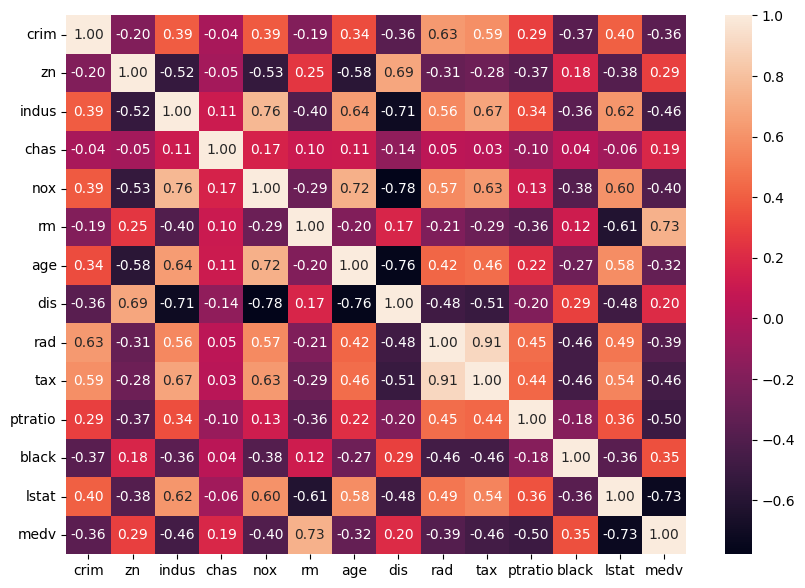

In [18]:
# heatmap correlation
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Interpretasi & Insight dari Heatmap Korelasi**

Heatmap menunjukkan pola hubungan yang kuat antara beberapa variabel lingkungan, demografi, dan karakteristik properti terhadap harga rumah (medv). Di antara seluruh fitur, rm (jumlah rata-rata kamar) memiliki korelasi positif tertinggi dengan harga rumah (≈ +0.70). Ini menegaskan bahwa rumah dengan jumlah kamar lebih banyak cenderung memiliki harga yang lebih tinggi, sehingga fitur ini sangat penting dalam model regresi.

Sebaliknya, variabel lstat (persentase status ekonomi rendah) memiliki korelasi negatif yang sangat kuat (≈ -0.74) terhadap harga rumah. Artinya, semakin tinggi proporsi penduduk berstatus sosial rendah di suatu area, semakin rendah pula harga rumahnya. Variabel ini akan menjadi prediktor kunci dalam memahami area dengan penurunan nilai properti.

Fitur nox (konsentrasi polusi nitrogen oksida) juga menunjukkan korelasi negatif signifikan (≈ -0.42) dengan medv. Ini mencerminkan bahwa kualitas udara yang buruk berkontribusi pada nilai properti yang lebih rendah. Selain itu, dis (jarak ke pusat kota) memperlihatkan korelasi positif sedang (≈ +0.25), menandakan bahwa rumah di lokasi lebih jauh dari pusat kota cenderung memiliki harga sedikit lebih tinggi, kemungkinan akibat lingkungan yang lebih tenang dan suburban.

Beberapa fitur juga menunjukkan multikolinearitas kuat, seperti

1. rad dan tax (korelasi ≈ +0.91)

2. nox dan indus (≈ +0.77)

3. dis dengan nox, indus, atau age (korelasi negatif tinggi ≈ –0.7)

Multikolinearitas ini perlu diperhatikan dalam pemilihan fitur dan regularisasi model, karena dapat mempengaruhi stabilitas dan interpretasi koefisien regresi.

Secara keseluruhan, heatmap menunjukkan bahwa harga rumah Boston sangat dipengaruhi oleh kualitas lingkungan, status ekonomi penduduk, dan karakteristik fisik rumah. Fitur seperti rm, lstat, dis, dan nox sangat relevan untuk model prediksi, sedangkan fitur yang sangat berkorelasi satu sama lain perlu ditangani dengan pendekatan seperti Ridge, Lasso, atau PCA.

### Seleksi Feature

Terdapat banyak pertimbangan dalam tahap ini. Dimana terdapat fitur-fitur yang redundant/perlu dipertimbangkan untuk di hapus, seperti:

1. rad dan tax (Korelasi +0.91 → sangat tinggi).
Kedua fitur ini memiliki korelasi sangat kuat, hampir duplikasi informasi. Dalam regresi linear, multikolinearitas setinggi ini bisa membuat koefisien tidak stabil.


2. indus dan nox (Korelasi +0.77 → tinggi).
Area industri cenderung meningkatkan polusi NOx, sehingga informasinya tumpang tindih.

3. age dan dis (Korelasi –0.76 → tinggi).
Daerah yang lebih dekat kota memiliki rumah lebih tua, sehingga age dan dis memberi sinyal sosial-ekonomi yang mirip.

4. lstat dan rm berlawanan arah tetapi kuat (–0.74 dan +0.70 dengan medv).
Bukan redundant satu sama lain, tetapi keduanya sudah sangat informatif, sehingga beberapa fitur lain yang lebih lemah mungkin tidak dibutuhkan.


Terdapat juga fitur yang kurang relevan / bisa dipertimbangkan untuk drop

1. chas (apakah dekat sungai) — Korelasi sangat kecil (+0.11). Fitur biner ini tidak punya pengaruh kuat terhadap harga rumah. Dalam banyak eksperimen, chas sering tidak signifikan dan bisa di-drop tanpa mengurangi performa model.

**Kesimpulan Seleksi Fitur**

1. Kandidat Drop (Paling Lemah)
* chas → korelasi rendah, dampak kecil.

2. Kandidat Redundant (hati-hati jika tetap dipakai)
* rad vs tax → pilih salah satu.
* indus vs nox → pilih salah satu jika ingin model simpel.
* age vs dis → terlalu berkorelasi.

3. Tidak di-drop (sangat penting untuk prediksi)
* rm (fitur paling kuat positif)
* lstat (fitur paling kuat negatif)

Untuk mengetahui lebih dalam apakah fitur redundan ini mempengaruhi model, maka akan dibuat lebih dari satu data train dengan berbagai skenario. Sehingga mengetahui mana model yang lebih baik.

In [19]:
# drop weak correlation features

#variable baru 'feature_df_nochas_train' digunakan untuk mempertahankan data awal
feature_df_nochas_train = feature_df_train.drop(columns='chas')
feature_df_nochas_validation = feature_df_validation.drop(columns='chas')
feature_df_nochas_test = feature_df_test.drop(columns='chas')

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_nochas_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.743075
2,zn,2.468292
3,indus,3.703492
4,nox,4.523782
5,rm,1.969469
6,age,3.123820
7,dis,4.390457
8,rad,7.104246
9,tax,8.196637
10,ptratio,1.849913


## Model Training

### **Ridge Regression**

Sebelumnya sudah dibuat 2 mekanisme percobaan, yakni dengan menghapus kolom *'chas'* dan tidak menghapus kolom *'chas'*. Sehingga disini ditampilkan dua skenario yang berbeda.

#### Data dengan Chas

In [21]:
from sklearn.linear_model import LinearRegression, Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)


simple_reg = LinearRegression().fit(X_df_train, y_df_train)
simple_reg

LinearRegression()

In [22]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the alphas (lambda)
alphas = [0.01, 0.1, 1, 10]

# dictionary to store the models
ridge_models = {}

# loop through the alphas and train the models
for alpha in alphas:
    model_name = f'ridge_reg_{alpha}'
    ridge_models[model_name] = Ridge(alpha=alpha, random_state=42)
    ridge_models[model_name].fit(X_df_train, y_df_train)

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

# validation data
X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

# alphas
alphas = [0.01, 0.1, 1, 10]

# loop through the models and calculate RMSE
for alpha in alphas:
    model_name = f'ridge_reg_{alpha}'
    y_predict_validation = ridge_models[model_name].predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation, y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.824336534783035
RMSE of Ridge regression model with alpha = 0.1 is 4.814871021929368
RMSE of Ridge regression model with alpha = 1 is 4.789449769284769
RMSE of Ridge regression model with alpha = 10 is 4.756914989741643


#### Data No-Chas

In [25]:
from sklearn.linear_model import LinearRegression, Ridge

# train the model
X_df_train = feature_df_nochas_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)


simple_reg = LinearRegression().fit(X_df_train, y_df_train)
simple_reg

LinearRegression()

In [26]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_nochas_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the alphas (lambda)
alphas = [0.01, 0.1, 1, 10]

# dictionary to store the models
ridge_models = {}

# loop through the alphas and train the models
for alpha in alphas:
    model_name = f'ridge_reg_{alpha}'
    ridge_models[model_name] = Ridge(alpha=alpha, random_state=42)
    ridge_models[model_name].fit(X_df_train, y_df_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# validation data
X_df_validation = feature_df_nochas_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

# alphas
alphas = [0.01, 0.1, 1, 10]

# loop through the models and calculate RMSE
for alpha in alphas:
    model_name = f'ridge_reg_{alpha}'
    y_predict_validation = ridge_models[model_name].predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation, y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.8301372507539
RMSE of Ridge regression model with alpha = 0.1 is 4.824402741729883
RMSE of Ridge regression model with alpha = 1 is 4.81261211176034
RMSE of Ridge regression model with alpha = 10 is 4.785078965132185



#### **Perbandingan Hasil**

##### **1. Skenario 1 – Dengan fitur `chas`**

RMSE terbaik ≈ **4.7569** (α = 10)

##### **2. Skenario 2 – Tanpa fitur `chas`**

RMSE terbaik ≈ **4.7851** (α = 10)

Selisih RMSE terbaik antara keduanya:

[
4.7851 - 4.7569 = 0.0282
]

Selisih hanya **0.028** poin — ini **sangat kecil**, hampir tidak berarti dalam konteks nilai medv yang bisa mencapai puluhan ribu.

---

####  **Apakah `chas` berpengaruh besar?**

Dari heatmap sebelumnya, dapat dilihat bahwa fitur `chas` memiliki:

* Korelasi rendah dengan harga rumah (±0.11)
* Kontribusi informasi kecil

Dan hasil pemodelan ini memperkuat temuan tersebut:

* Menghapus `chas` **hampir tidak mengubah RMSE**
* Artinya model tidak terlalu bergantung pada fitur tersebut

---

#### **Skenario Mana yang Lebih Baik Dipilih?**

##### **Jika tujuannya akurasi murni**

Pilih **Skenario 1 (dengan `chas`)**, karena:

* RMSE sedikit lebih rendah
* Tidak ada downside besar jika tetap dipakai

##### **Jika tujuannya model lebih sederhana dan interpretatif**

Pilih **Skenario 2 (tanpa `chas`)**, karena:

* Model menjadi lebih sederhana
* Tidak kehilangan performa berarti
* Fitur `chas` terbukti hampir tidak berkontribusi pada prediksi

---

####  **Kesimpulan Utama**

**Secara performa, keduanya hampir sama.**
Perbedaan RMSE sangat kecil dan **tidak signifikan**.

In [29]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_nochas_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

ridge_best = Ridge(alpha=10, random_state=42)
ridge_best.fit(X_df_train, y_df_train)

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_nochas_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,18.645789
1,crim,-0.105120
2,zn,0.041338
3,indus,-0.008083
4,nox,-1.583076
5,rm,4.624689
6,age,-0.008741
7,dis,-1.260166
8,rad,0.229975
9,tax,-0.012092


Model regresi linear Ridge yang telah dilatih menunjukkan bahwa fitur rm memiliki koefisien positif terbesar, yaitu 4,624689, yang berarti bahwa setiap peningkatan 1 unit dalam rm akan meningkatkan target (y) sebesar 4,624689 unit, dengan asumsi bahwa fitur-fitur lainnya tetap konstan. Sebaliknya, fitur nox memiliki koefisien negatif terbesar, yaitu -1,583076, yang berarti bahwa setiap peningkatan 1 unit dalam nox akan menurunkan target (y) sebesar 1,583076 unit. Fitur-fitur lainnya, seperti crim, zn, indus, age, dis, rad, tax, ptratio, black, dan lstat, juga memiliki koefisien-koefisien yang signifikan, tetapi dengan besaran yang lebih kecil. Intercept model adalah 18,645789, yang berarti bahwa jika semua fitur bernilai 0, maka target (y) akan bernilai 18,645789.

### **Lasso**

In [30]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# train the model
X_df_train = feature_df_nochas_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# Simple Linear Regression
simple_reg = LinearRegression().fit(X_df_train, y_df_train)

In [31]:
# Lasso Regression
# define the alphas (lambda)
alphas = [0.01, 0.1, 1, 10]

# dictionary to store the models
lasso_models = {}

# loop through the alphas and train the models
for alpha in alphas:
    model_name = f'lasso_reg_{alpha}'
    lasso_models[model_name] = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_models[model_name].fit(X_df_train, y_df_train)

In [32]:
# validation data
X_df_validation = feature_df_nochas_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

# loop through the models and calculate RMSE
for alpha in alphas:
    model_name = f'lasso_reg_{alpha}'
    y_predict_validation = lasso_models[model_name].predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation, y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')


RMSE of Lasso regression model with alpha = 0.01 is 4.816485540043334
RMSE of Lasso regression model with alpha = 0.1 is 4.822772880600323
RMSE of Lasso regression model with alpha = 1 is 4.722183144510947
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


Hasil output menunjukkan bahwa model Lasso regression dengan alpha = 1 memiliki RMSE (Root Mean Squared Error) yang paling rendah, yaitu 4,722183144510947. Ini berarti bahwa model dengan alpha = 1 memiliki kinerja yang paling baik dalam memprediksi data validasi. Model dengan alpha = 0,01 dan alpha = 0,1 memiliki RMSE yang relatif dekat, yaitu 4,816485540043334 dan 4,822772880600323, sedangkan model dengan alpha = 10 memiliki RMSE yang paling tinggi, yaitu 5,426622694252769. Ini menunjukkan bahwa alpha = 1 adalah nilai yang paling optimal untuk model Lasso regression dalam kasus ini.

#### Coefficients

In [33]:
from sklearn.linear_model import Lasso

# train the model
X_df_train = feature_df_nochas_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

lasso_best = Lasso(alpha=1, random_state=42, max_iter=10000)
lasso_best.fit(X_df_train, y_df_train)

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_nochas_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})
coef_df

,feature,coefficient
0,intercept,29.188142
1,crim,-0.066563
2,zn,0.030746
3,indus,-0.000000
4,nox,-0.000000
5,rm,2.286992
6,age,0.023834
7,dis,-0.626395
8,rad,0.176576
9,tax,-0.010299


## Evaluasi Model

### Ridge

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prediksi pada set pengujian
X_df_test = feature_df_nochas_test.to_numpy()
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

y_predict_test = ridge_best.predict(X_df_test)

# Evaluasi model
mae = mean_absolute_error(y_df_test, y_predict_test)
mape = np.mean(np.abs((y_df_test - y_predict_test) / y_df_test)) * 100
rmse = np.sqrt(mean_squared_error(y_df_test, y_predict_test))

print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'RMSE: {rmse}')

MAE: 3.1850036172678986
MAPE: 17.268622073411635%
RMSE: 5.057472132666403


Model Ridge memiliki MAE sebesar 3,185, MAPE sebesar 17,27%, dan RMSE sebesar 5,057. Hasil ini menunjukkan bahwa model Ridge memiliki kinerja yang cukup baik dalam memprediksi nilai target, dengan kesalahan absolut rata-rata sekitar 3,185 unit dan kesalahan persentase rata-rata sekitar 17,27%. Namun, nilai RMSE yang relatif tinggi menunjukkan bahwa model masih memiliki beberapa kesalahan besar dalam prediksinya.

### Lasso

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prediksi pada set pengujian
X_df_test = feature_df_nochas_test.to_numpy()
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

y_predict_test = lasso_best.predict(X_df_test)

# Evaluasi model
mae = mean_absolute_error(y_df_test, y_predict_test)
mape = np.mean(np.abs((y_df_test - y_predict_test) / y_df_test)) * 100
rmse = np.sqrt(mean_squared_error(y_df_test, y_predict_test))

print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'RMSE: {rmse}')

MAE: 3.2342427695277642
MAPE: 16.947772374007485%
RMSE: 4.953658325185925


Model Lasso memiliki MAE sebesar 3,234, MAPE sebesar 16,95%, dan RMSE sebesar 4,954. Hasil ini menunjukkan bahwa model Lasso memiliki kinerja yang sedikit lebih baik daripada model Ridge dalam memprediksi nilai target, dengan kesalahan absolut rata-rata sekitar 3,234 unit dan kesalahan persentase rata-rata sekitar 16,95%. Nilai RMSE yang lebih rendah daripada model Ridge menunjukkan bahwa model Lasso memiliki kesalahan yang lebih kecil dalam prediksinya.

## Note
Seluruh code ini sudah di-publish pada github pribadi: